In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('./data/labeled_data.csv')

In [4]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Yes votes per bill for democrats and republicans

In [11]:
# make yes votes 1 and other votes 0
df_yes = df.applymap(lambda x: int('1') if x =='y' else int('0'))

In [12]:
df_yes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [13]:
# drop the binarized party column
df_yes.drop(columns = ['party'], inplace=True)

In [14]:
# put the party names onto the dataframe for graphing
df_yes['party'] = df['party']

In [15]:
df_yes.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,party
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,republican
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,democrat


In [17]:
# get sums for yes votes for graphing
df_yes_sum = df_yes.groupby(by='party').sum().T
df_yes_sum

party,democrat,republican
handicapped-infants,156,31
water-project-cost-sharing,120,75
adoption-of-the-budget-resolution,231,22
physician-fee-freeze,14,163
el-salvador-aid,55,157
religious-groups-in-schools,123,149
anti-satellite-test-ban,200,39
aid-to-nicaraguan-contras,218,24
mx-missile,188,19
immigration,124,92


### Make Graph
- (referred to https://www.python-graph-gallery.com/12-stacked-barplot-with-matplotlib)

In [20]:
# data for graph
bars1 = df_yes_sum['democrat'].tolist()
bars2 = df_yes_sum['republican'].tolist()
bar_height = np.add(bars1, bars2).tolist()

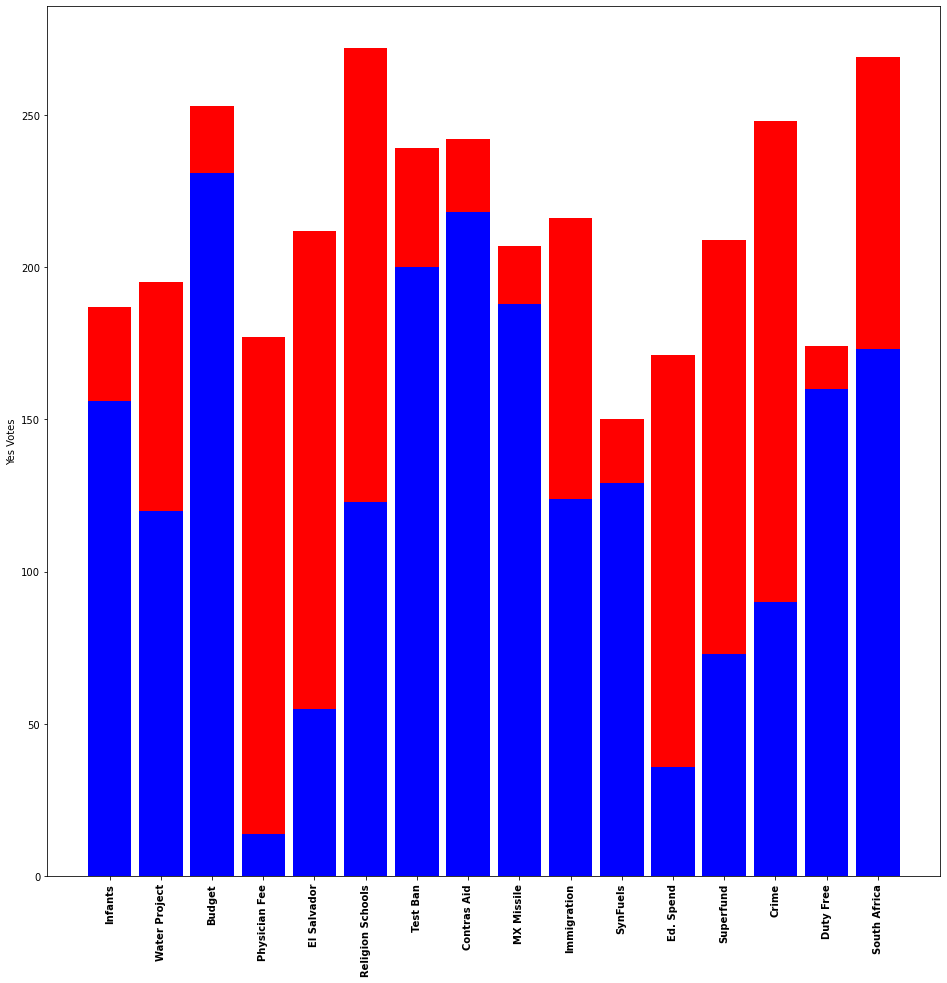

In [23]:
# position of bars on x axis
r = list(range(16))

# Names of group and bar width
names = ['Infants','Water Project','Budget','Physician Fee','El Salvador', 'Religion Schools', 
        'Test Ban', 'Contras Aid', 'MX Missile', 'Immigration', 'SynFuels', 'Ed. Spend', 'Superfund', 
        'Crime', 'Duty Free', 'South Africa']
barWidth = 0.85

# Set figure size
plt.figure(figsize=(16,16))

# plot the two bars
plt.bar(r, bars1, color='b', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='r', width=barWidth)

# Put the names on the x axis
plt.xticks(r, names, fontweight='bold', rotation=90)
plt.ylabel('Yes Votes')

plt.show()

### Ideas:
- Add number of votes to pass bill line to graph above
- Do the graph above for question marks instead of yes
- do republican and democrat hue for bills with similar yes no ? distributions identified in EDA